In [5]:
import os
import sys
sys.path.insert(0, "..")
import numpy as np
import cv2
import torch
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
# Loss
device = 'cuda'
df = pd.read_csv("pred.csv")
df1 = pd.read_csv("pred_using_gt_motion.csv")


df.head(2)

,Unnamed: 0,pitch_gt,yaw_gt,pitch_pred,yaw_pred,pitch_syn_pred,yaw_syn_pred,pose_x,pose_y,pose_z,pitch_src,yaw_src
0,0,-12.335800,26.906329,-18.003621,27.484403,-19.405562,38.752925,1.707164,7.911664,2.578716,-28.621109,-2.296000
1,1,3.901194,18.346445,3.000828,18.388301,11.824723,25.230997,18.225553,-0.753106,-0.872434,-7.997309,-14.277568


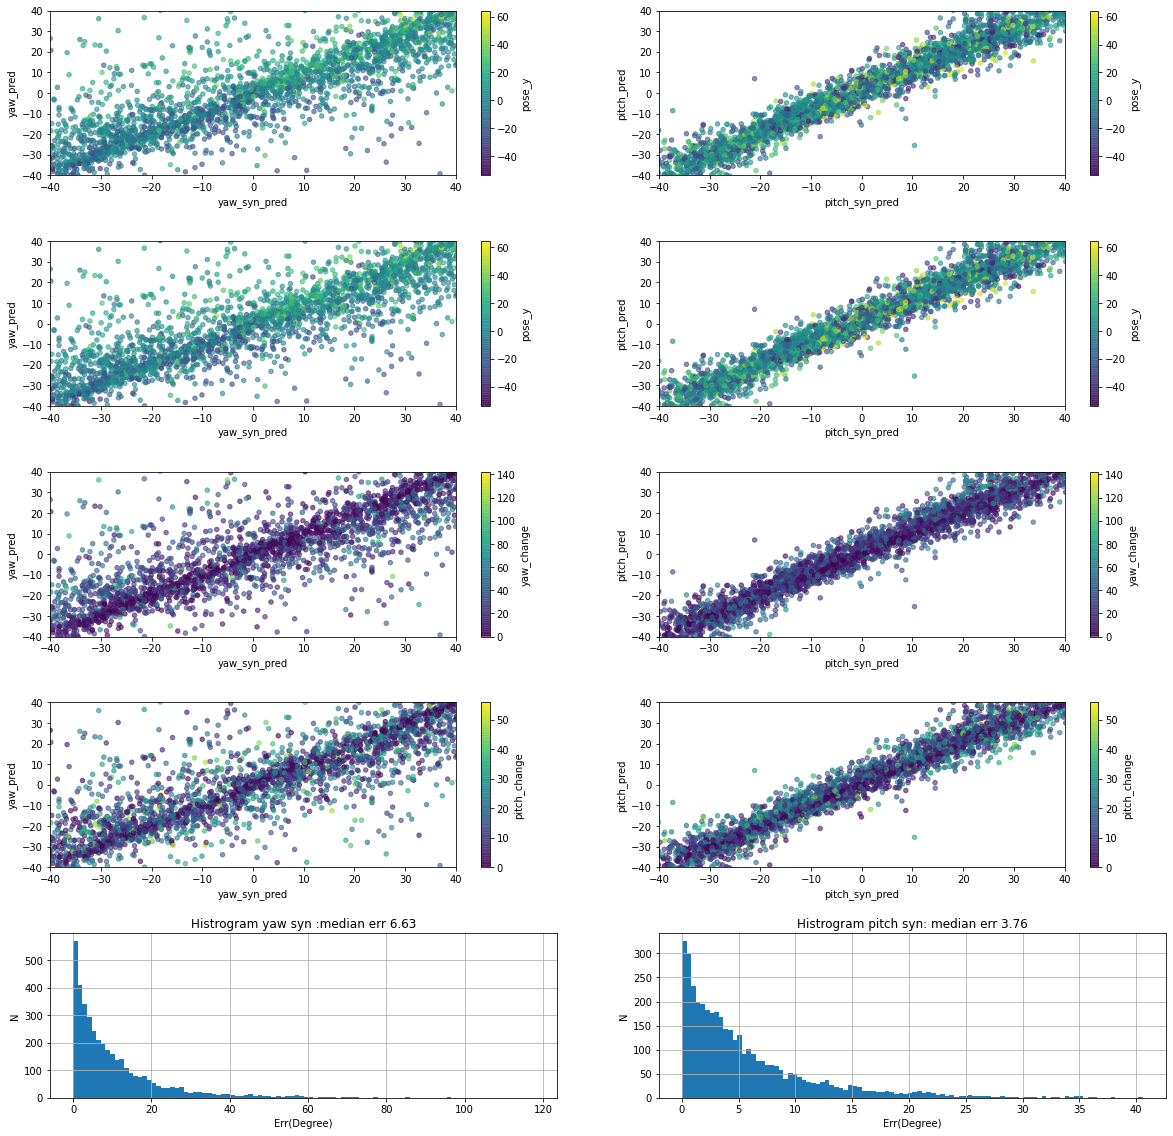

In [9]:
def plot_benchmark(df):
    fig, ax = plt.subplots(5,2, figsize=(20, 20))
    plt.subplots_adjust(hspace=0.4)
    df["yaw_err"] = (df["yaw_pred"] - df["yaw_syn_pred"]).abs()
    df["pitch_err"] = (df["pitch_pred"] - df["pitch_syn_pred"]).abs()
    df["yaw_change"] = (df["yaw_src"] - df["yaw_gt"]).abs()
    df["pitch_change"] = (df["pitch_src"] - df["pitch_gt"]).abs()

    df.plot.scatter(y='yaw_pred', x='yaw_syn_pred', c='pose_y', colormap='viridis', sharex=False, xlim=[-40,40],  ylim=[-40,40], alpha=0.6, ax=ax[0][0])
    df.plot.scatter(y='pitch_pred', x='pitch_syn_pred', c='pose_y', colormap='viridis', sharex=False, xlim=[-40,40],  ylim=[-40,40], alpha=0.6, ax=ax[0][1])

    df.plot.scatter(y='yaw_pred', x='yaw_syn_pred', c='pose_y', colormap='viridis', sharex=False, xlim=[-40,40],  ylim=[-40,40], alpha=0.6, ax=ax[1][0])
    df.plot.scatter(y='pitch_pred', x='pitch_syn_pred', c='pose_y', colormap='viridis', sharex=False, xlim=[-40,40],  ylim=[-40,40], alpha=0.6, ax=ax[1][1])

    df.plot.scatter(y='yaw_pred', x='yaw_syn_pred', c='yaw_change', colormap='viridis', sharex=False, xlim=[-40,40],  ylim=[-40,40], alpha=0.6, ax=ax[2][0])
    df.plot.scatter(y='pitch_pred', x='pitch_syn_pred', c='yaw_change', colormap='viridis', sharex=False, xlim=[-40,40],  ylim=[-40,40], alpha=0.6, ax=ax[2][1])

    df.plot.scatter(y='yaw_pred', x='yaw_syn_pred', c='pitch_change', colormap='viridis', sharex=False, xlim=[-40,40],  ylim=[-40,40], alpha=0.6, ax=ax[3][0])
    df.plot.scatter(y='pitch_pred', x='pitch_syn_pred', c='pitch_change', colormap='viridis', sharex=False, xlim=[-40,40],  ylim=[-40,40], alpha=0.6, ax=ax[3][1])

    df.yaw_err.hist(bins=100, ax=ax[4][0])
    ax[4][0].set_title(f"Histrogram yaw syn :median err {df.yaw_err.median():.02f}")
    ax[4][0].set_xlabel("Err(Degree)")
    ax[4][0].set_ylabel("N")
    
    df.pitch_err.hist(bins=100, ax=ax[4][1])
    ax[4][1].set_title(f"Histrogram pitch syn: median err {df.pitch_err.median():.02f}")
    ax[4][1].set_xlabel("Err(Degree)")
    ax[4][1].set_ylabel("N")
plot_benchmark(df)

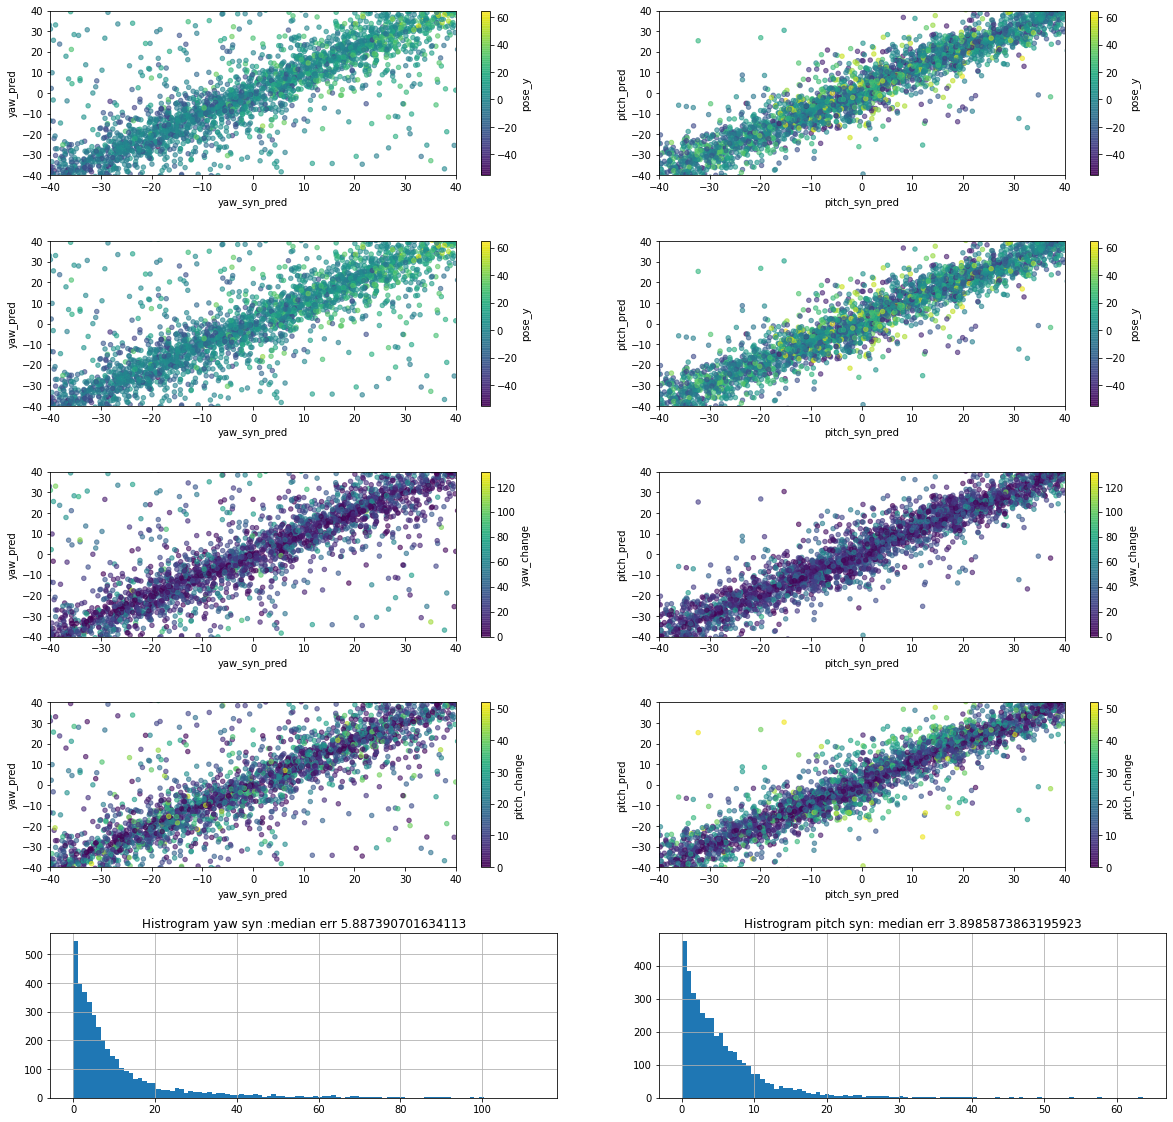

In [7]:
plot_benchmark(df1)

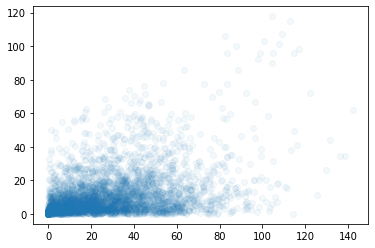

In [55]:
plt.scatter(df.yaw_change, df.yaw_err, alpha=0.05)


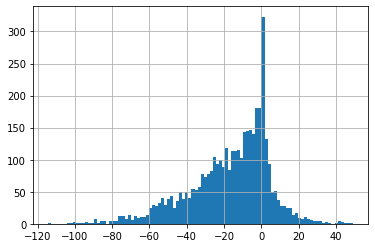

In [57]:
df["percentage"] = df.yaw_err-df.yaw_change
df.percentage.hist(bins=100)


In [10]:
df['yaw_change_bins'] = pd.cut(df['yaw_change'], 4)
df['pose_y_abs_bin'] = pd.cut(df['pose_y'].abs(), 5)
df['pose_x_bin'] = pd.cut(df['pose_x'], 5)


# df['yaw_change_bins']

Text(0, 0.5, 'Error (Degree)')

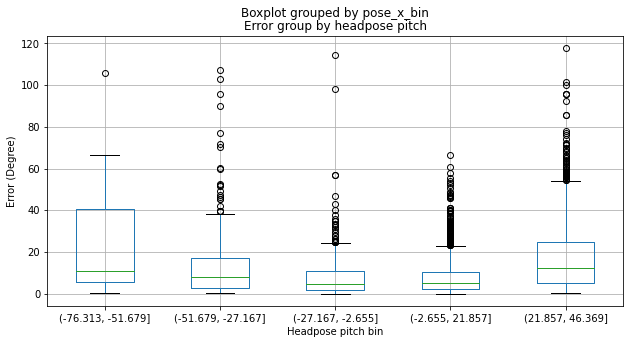

In [15]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
df.boxplot(column=['yaw_err'], by=['pose_x_bin'], ax=ax, vert=True)
ax.set_title(f'Error group by headpose pitch')
ax.set_xlabel(f'Headpose pitch bin')
ax.set_ylabel(f'Error (Degree)')

Text(0, 0.5, 'Error (Degree)')

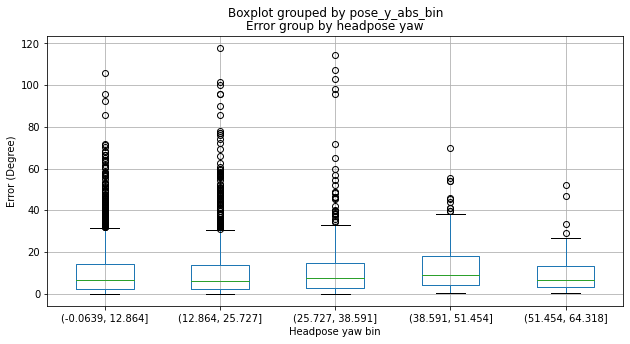

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
df.boxplot(column=['yaw_err'], by=['pose_y_abs_bin'], ax=ax, vert=True)
ax.set_title(f'Error group by headpose yaw')
ax.set_xlabel(f'Headpose yaw bin')
ax.set_ylabel(f'Error (Degree)')

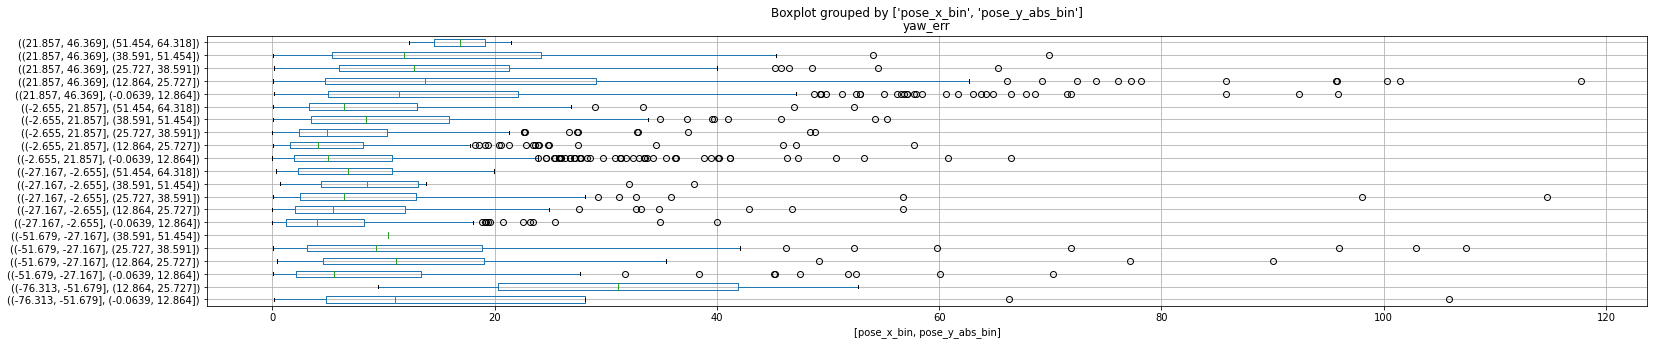

In [100]:
fig, ax = plt.subplots(1,1, figsize=(25,5))
df.boxplot(column=['yaw_err'], by=['pose_x_bin','pose_y_abs_bin'], ax=ax, vert=False)

Text(0, 0.5, 'Error (Degree)')

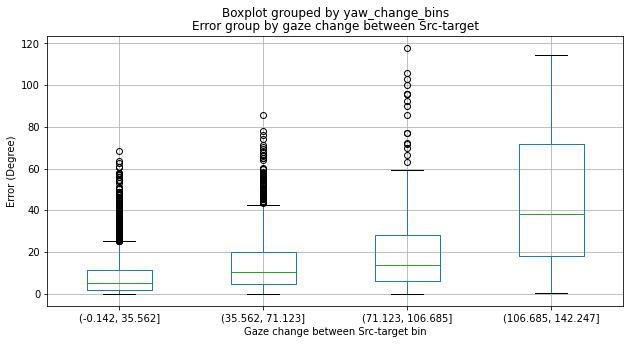

In [20]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
df.boxplot(column=['yaw_err'], by=['yaw_change_bins'], ax=ax, vert=True)
ax.set_title(f'Error group by gaze change between Src-target')
ax.set_xlabel(f'Gaze change between Src-target bin')
ax.set_ylabel(f'Error (Degree)')

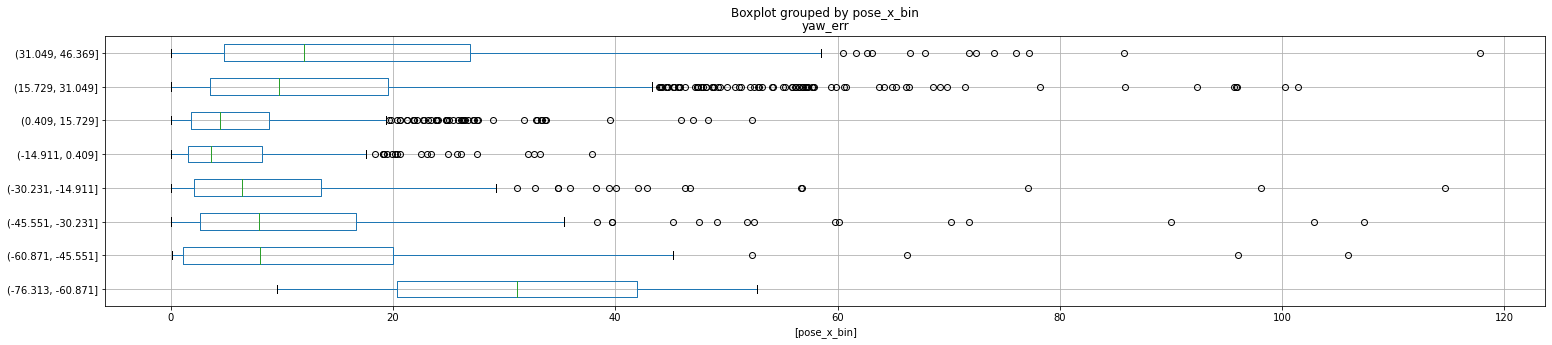

In [94]:
fig, ax = plt.subplots(1,1, figsize=(25,5))
df.boxplot(column=['yaw_err'], by=['pose_x_bin'], ax=ax, vert=False)

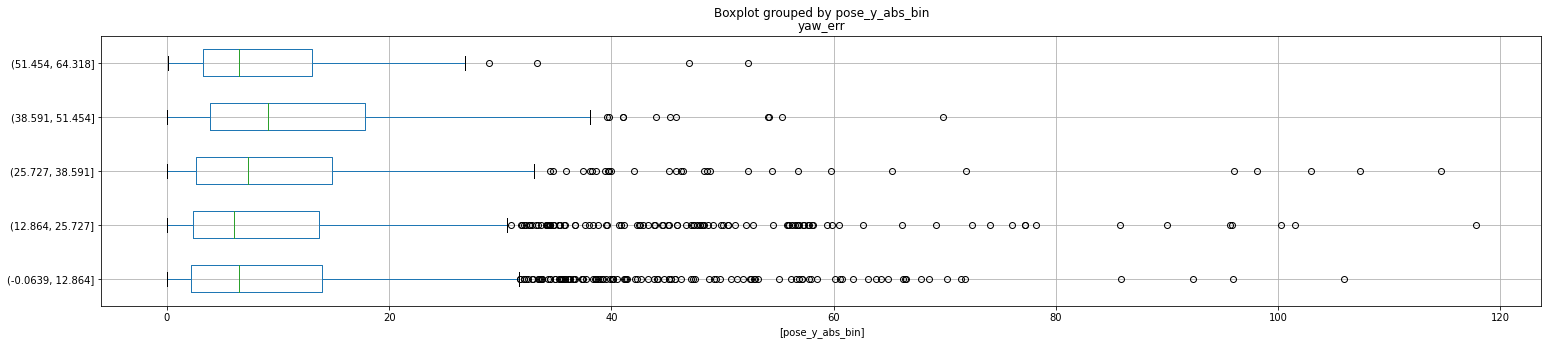

In [95]:
fig, ax = plt.subplots(1,1, figsize=(25,5))
df.boxplot(column=['yaw_err'], by=['pose_y_abs_bin'], ax=ax, vert=False)

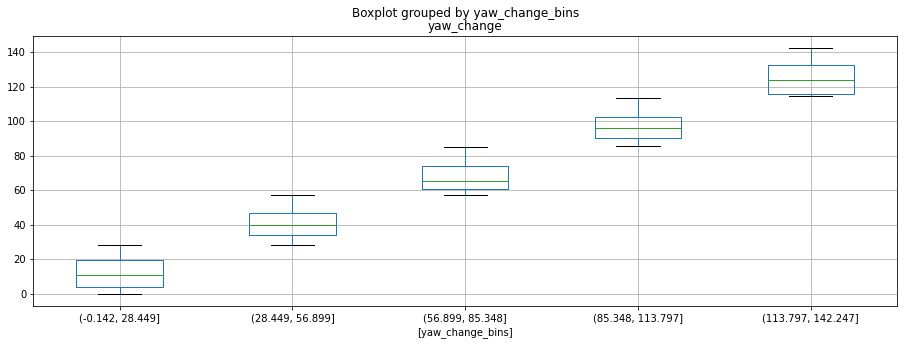

In [65]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
df.boxplot(column=['yaw_change'], by=['yaw_change_bins'], ax=ax)

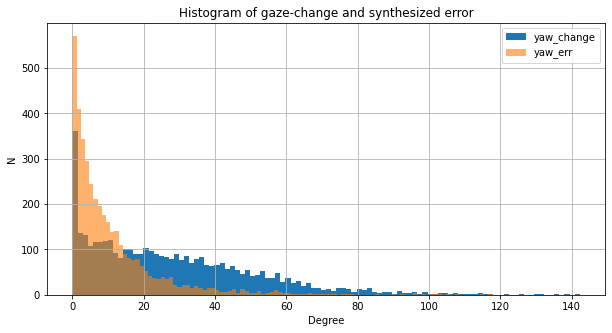

In [23]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

df.yaw_change.hist(bins=100, label="yaw_change", ax=ax)
df.yaw_err.hist(bins=100, label="yaw_err", alpha=0.6, ax=ax)
ax.set_title(f'Histogram of gaze-change and synthesized error')
ax.set_xlabel(f'Degree')
ax.set_ylabel(f'N')
plt.legend()

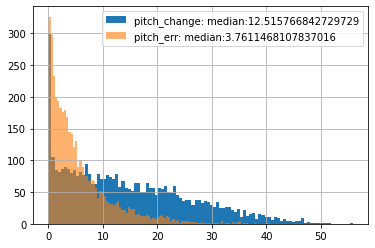

In [103]:
df.pitch_change.hist(bins=100, label=f"pitch_change: median:{df.pitch_change.median()}")
df.pitch_err.hist(bins=100, label=f"pitch_err: median:{df.pitch_err.median()}", alpha=0.6)
plt.legend()